In [1]:
!pip install matplotlib

In [100]:
import matplotlib.pyplot as plt
import librosa
import glob
import os
import numpy as np
import random
from functools import partial
from IPython.display import Audio

In [129]:
root_path = r'results'
suffix = r'test_latest\audios\fake_B'
exps = [
    'real_noisy_helicopter_test',
    'attn_gan_old_with_paper_pipeline',
    'attn_gan_raw_feat_librispeech_helicopter',
    'unet_gan_raw_feat_librispeech_helicopter',
]

In [130]:
os.path.join(root_path, exps[1], suffix, '*.wav')

'results\\attn_gan_old_with_paper_pipeline\\test_latest\\audios\\fake_B\\*.wav'

In [131]:
sr = 16000

In [132]:
cal_mel = partial(librosa.feature.melspectrogram, sr=sr, n_fft=2048, hop_length=512, window='hamm', n_mels=80)
cal_mel

functools.partial(<function melspectrogram at 0x000002E0A499E200>, sr=16000, n_fft=2048, hop_length=512, window='hamm', n_mels=80)

In [133]:
files = os.listdir(os.path.join(root_path, exps[1], suffix))

def random_file():
    f = random.choice(files)
    data = {}
    for k in exps:
        ext = '.flac' if 'real' in k else '.wav'
        if ext == '.wav':
            p = os.path.join(root_path, k, suffix, f.rsplit('.', 1)[0] + ext)
        else:
            p = os.path.join(root_path, k, f.rsplit('.', 1)[0] + ext)
        data[k] = p
    return data

In [134]:
random_file().keys()

dict_keys(['real_noisy_helicopter_test', 'attn_gan_old_with_paper_pipeline', 'attn_gan_raw_feat_librispeech_helicopter', 'unet_gan_raw_feat_librispeech_helicopter'])

In [141]:
def plot():
    data = random_file()
    fig, ax = plt.subplots(nrows=4, figsize=(20, 8), sharex=True)
    for i, (k, v) in enumerate(data.items()):
        w, _ = librosa.load(v, sr=None)
        ax[i].imshow(librosa.power_to_db(cal_mel(y=w)))
        ax[i].set_title(k)
        print(k)
        display(Audio(data=w, rate=sr))
    fig.tight_layout()
    plt.show()

real_noisy_helicopter_test


attn_gan_old_with_paper_pipeline


attn_gan_raw_feat_librispeech_helicopter


unet_gan_raw_feat_librispeech_helicopter


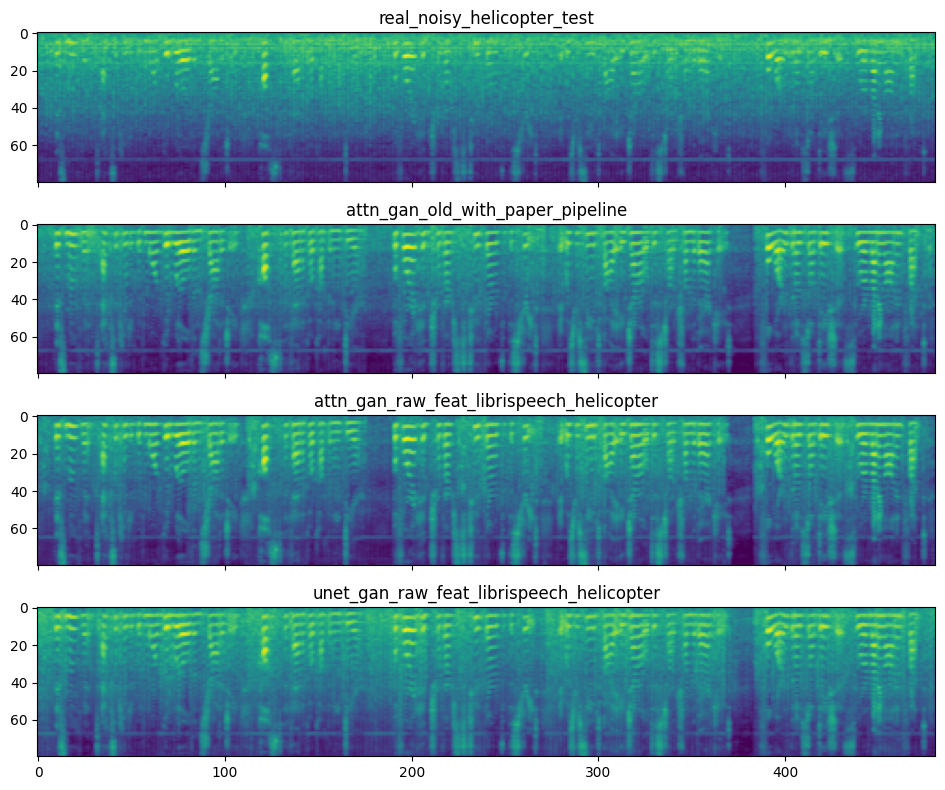

In [142]:
plot()